<a href="https://colab.research.google.com/github/nurinaqilahj/Computer-Assignment-eigenvalues-and-eigenvector/blob/main/U2101198.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The one-dimensional Schroedinger equation.

*   Eigenvalue is potential function and energy.
*   Eigenvector is wavefunction

Steps:

1.   Solve the Schrodinger eqaution using Numerov method for the energy guess.
2.   Adjust the energy, E based on the mismatch between the wavefunction at the boundaries.
3. Repeat the process until the mismatch is below a set tolerance. Correct eigenvalue has been found.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
n = 2              # Quantum number
a = 1              # Parameter (adjust as needed)
lamda = 4          # Lambda (potential parameter)
hbar = 1.0         # Reduced Planck's constant (normalized)
m = 1.0            # Mass of the particle (normalized)
xL = -3.0         # Minimum x value
xR = 3.0          # Maximum x value
num_points = 1000   # Number of grid points
tol = 1e-6         # Tolerance for the energy search
max_iter = 100     # Maximum iterations for secant method

# Step size
h = (xR - xL) / num_points

# Set up the grid for solving the Schrödinger equation
x = np.linspace(xL, xR, num_points)


*   This the the parameter given in the question.
*   Range of domain is set between -3 to 3 with 1000 of number points.
*   The tolerance is set as 1e-6 and the maximum iterations for secant method is set as 100
*   h is parameter for step size
*   x is generate the domain within number of points.



In [ ]:
# Energy guess using given equation (for secant method)
E_guess = ((hbar*a)**2 / 2*m)*(lamda*(lamda-1)/2 - (lamda - 1 - n)**2)
print("At n = 2")
print ("Guess eigenvalue is ", E_guess)

E_guess is the energy guess when the quantum number, n = 2. This energy guess is used to calculate the eigenvalue. The equation of energy at n is
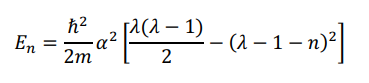

In [5]:
# Potential function
def potential(x):
    return ((hbar * a)**2 / (2 * m)) * lamda * (lamda - 1) * (0.5 - 1 / np.cosh(a * x)**2)


For the bound particle in the potential well, the equation of potential is
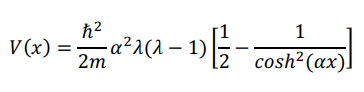

In [6]:
# Numerov method to solve the Schrödinger equation
def numerov(x, E, V):
    # Initialize wavefunction array
    psi = np.zeros(len(x))

    # Boundary conditions: psi(0) = 0 and psi(dx) = 0 (for bound states)
    psi[0] = 0
    psi[1] = 1e-5  # A small value at the first point

    # Precompute k(x) = 2m/hbar^2 * (E - V(x))
    k = (2 * m / hbar**2) * (E - V(x))

    # Apply the Numerov method
    for i in range(1, len(x) - 1):
        psi[i + 1] = (2 * psi[i] * (1 - (5 * k[i] * h**2 / 12))) - (psi[i - 1] * (1 + (k[i - 1] * h**2 / 12))) / (1 + (k[i + 1] * h**2 / 12))

    return psi

*   Numerov algorithm is a numerical method for solving second-order differential equation.
*   The numerov() function solves the Schroedinger equation by applying the Numerov algorithm.
*   For boundary condition of wavefunction, the first point is set as zero while the second point is set as a small quantity.
*   The equation left wavefunction is integrate from left to the point xL+h and equation right wavefunction from right to xR-h.





In [7]:
# Function to calculate the mismatch at the boundaries (for the secant method)
def diff(E, x):
    psi = numerov(x, E, potential)

    # Check the mismatch at the boundary
    f0 = (psi[-1] + psi[0])  # For bound state, psi should be 0 at both boundaries
    return f0

The diff() function calculates the mismatch at the boundaries of the wavefunction. The wavefunction should ideally be zero at both boundaries. Therefore, the mismatch should be close to zero. This mismatch will help to adjust the energy value iteratively as we have to find the energy value that satisfies the boundary conditions of the wavefunction.

In [ ]:
# Secant method to find the eigenvalue
def secant_method(E1, E2, tol, max_iter, x):
    f1 = diff(E1, x)
    f2 = diff(E2, x)

    iter_count = 0
    while abs(f2) > tol and iter_count < max_iter:
        # Secant method update
        E_new = E2 - f2 * (E2 - E1) / (f2 - f1)

        # Update previous values
        E1, E2 = E2, E_new
        f1, f2 = f2, diff(E2, x)

        iter_count += 1

    return E2

# Initial guesses for the energy using the secant method
E1 = E_guess
E2 = E_guess + 0.1  # A small variation

# Find the eigenvalue using secant method
E_eigenvalue = secant_method(E1, E2, tol, max_iter, x)

# Print the eigenvalue
print("Calculated eigenvalue:", E_eigenvalue)

The secant_method() function iteratively adjust the energy until the mismatch at the boundaries becomes small enough. This indicate that correct eigenvalue (energy) has been found. The print calculated eigenvalue is the energy that satisfies the boundaries condition of the wavefunction.

In [ ]:
# Solve the Schrödinger equation with the found eigenvalue
psi = numerov(x, E_eigenvalue, potential)

# Normalize the wavefunction
psi /= np.sqrt(np.trapz(psi**2, x))  # Normalize using trapezoidal integration


*   Using Numerov method, wavefunction is compute at energy that has been found for the given potential and spatial grid.
*   Then, the wavefunction is normalized using numerical integation which is trapezoid rule. This is to ensures that the probability density function integrats to 1.



In [ ]:
# Plot the potential and wavefunction
plt.figure(figsize=(10, 6))
plt.axhline(E_guess, linestyle='--', label=f"Eigenvalue (E={E_guess:.2f})", color='green')
plt.axhline(E_eigenvalue, linestyle='--', label=f"Eigenvalue (E={E_eigenvalue:.2f})", color='blue')
plt.plot(x, potential(x), label="Potential V(x)", color="orange")
plt.plot(x, psi, label="Wavefunction", color="magenta")
plt.title(f"Wavefunction and Potential for Eigenvalue")
plt.xlabel("x")
plt.ylabel("Wavefunction / Potential")
plt.legend()
plt.grid(True)
plt.show()


Graph of potential and wavefunction. The Guess eigenvalue and calculated eigenvalue are shown as a horizontal line.

Running the program gives calculated eigenvalue = 2.854740037119128. Comparing with the guess eigenvalue = 2.5 under the tolerance that has been set. From the picture, the mismatch points are when at x = -1 and x = 1.


*   Green horizontal line = guess eigenvalue
*   Blue horizontal line = Calculated eigenvalue
*   Orange line = Potential function
*   Magenta line = Wavefunction

The output is
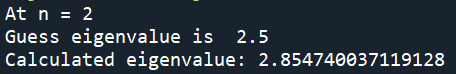

The graph output is
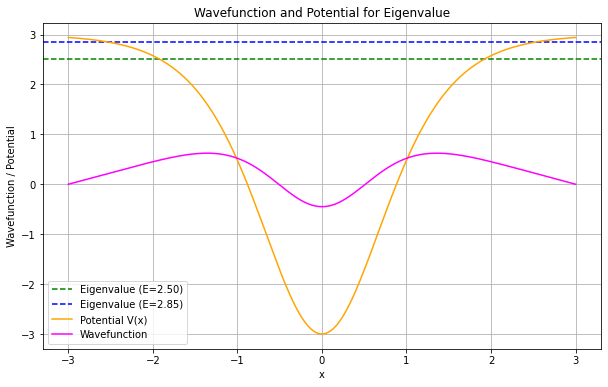